In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run ../src/cot/train.py --n_head 2 --n_layer 2 --nb_epochs 500 --load_checkpoint False

INFO:cot.data.data_processing:Generating data. Saving in /private/home/wesbz/Projects/composable-llm/data/raw/binary_copy
INFO:cot.data.data_processing:Loading training data for binary_copy problem.
INFO:cot.data.data_processing:Setting sampler.
INFO:cot.data.data_processing:Loading test data for binary_copy problem.
INFO:__main__:Number of training data: 255.
INFO:__main__:Model: Transformer(
  (embeddings): Embedding(
    (token_emb): Embedding(5, 128)
    (pos_emb): Embedding(19, 128)
  )
  (blocks): ModuleList(
    (0-1): 2 x TransformerBlock(
      (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv_mat): Linear(in_features=128, out_features=384, bias=False)
        (output): Linear(in_features=128, out_features=128, bias=False)
      )
      (norm_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (ffn): FeedForward(
        (fc1): Linear(in_features=128, out_features=512, bias=False)
        (fc2): Linear(in_feat

In [3]:
import matplotlib.pyplot as plt
import torch
from cot.data import BinaryCopy, Parity
from cot.config import CHECKPOINT_DIR

problem = BinaryCopy

path = CHECKPOINT_DIR / problem.prefix / 'model.pth'

checkpoint = torch.load(path)

evals = checkpoint["evals"]
ind = evals != -1
evals = evals[ind]

eval = checkpoint["evals"].argmax() + 1

acc_by_len = checkpoint["acc_by_len"][ind]
test_acc_by_len = checkpoint["test_acc_by_len"][ind]
spe_acc = checkpoint["spe_acc"][ind]
test_spe_acc = checkpoint["test_spe_acc"][ind]
losses = checkpoint["losses"]

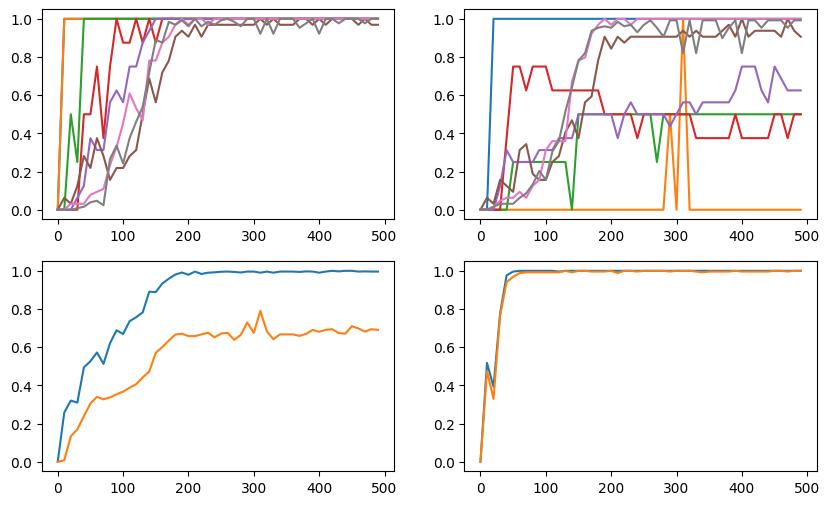

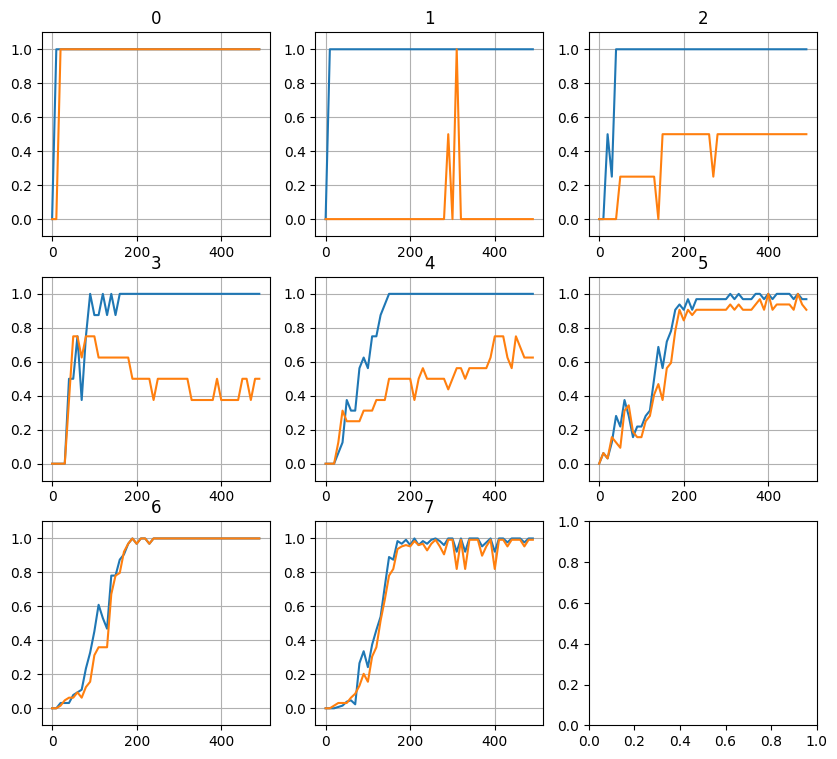

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].plot(evals, acc_by_len)
axes[0, 1].plot(evals, test_acc_by_len)
axes[1, 0].plot(evals, acc_by_len.mean(axis=1))
axes[1, 0].plot(evals, test_acc_by_len.mean(axis=1))
axes[1, 1].plot(evals, spe_acc[:, 2])
axes[1, 1].plot(evals, test_spe_acc[:, 2])
# axes[1, 1].set_xlim(0, 50)

nb_len = 8
fig, axes = plt.subplots(nb_len // 3 + (1 if nb_len % 3 else 0), 3, figsize=(10, 9))
for i in range(nb_len):
    axes[i // 3, i % 3].plot(evals, acc_by_len[:, i])
    axes[i // 3, i % 3].plot(evals, test_acc_by_len[:, i])
    axes[i // 3, i % 3].set_ylim(-.1, 1.1)
    axes[i // 3, i % 3].set_title(i)
    axes[i // 3, i % 3].grid()

In [5]:
%run ../src/cot/train.py --n_head 1 --n_layer 1 --nb_epochs 1500 --load_checkpoint False

INFO:cot.data.data_processing:Generating data. Saving in /private/home/wesbz/Projects/composable-llm/data/raw/binary_copy
INFO:cot.data.data_processing:Loading training data for binary_copy problem.
INFO:cot.data.data_processing:Setting sampler.
INFO:cot.data.data_processing:Loading test data for binary_copy problem.
INFO:__main__:Number of training data: 255.
INFO:__main__:Model: Transformer(
  (embeddings): Embedding(
    (token_emb): Embedding(5, 128)
    (pos_emb): Embedding(19, 128)
  )
  (blocks): ModuleList(
    (0): TransformerBlock(
      (norm_1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv_mat): Linear(in_features=128, out_features=384, bias=False)
        (output): Linear(in_features=128, out_features=128, bias=False)
      )
      (norm_2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (ffn): FeedForward(
        (fc1): Linear(in_features=128, out_features=512, bias=False)
        (fc2): Linear(in_features=5

In [6]:
import matplotlib.pyplot as plt
import torch
from cot.data import BinaryCopy, Parity
from cot.config import CHECKPOINT_DIR

problem = BinaryCopy

path = CHECKPOINT_DIR / problem.prefix / 'model.pth'

checkpoint = torch.load(path)

evals = checkpoint["evals"]
ind = evals != -1
evals = evals[ind]

eval = checkpoint["evals"].argmax() + 1

acc_by_len = checkpoint["acc_by_len"][ind]
test_acc_by_len = checkpoint["test_acc_by_len"][ind]
spe_acc = checkpoint["spe_acc"][ind]
test_spe_acc = checkpoint["test_spe_acc"][ind]
losses = checkpoint["losses"]

In [7]:
token_emb = checkpoint['model_state_dict']['embeddings.token_emb.weight'].cpu()
pos_emb = checkpoint['model_state_dict']['embeddings.pos_emb.weight'].cpu()

In [8]:
import numpy as np
from numpy.linalg import svd

In [9]:
w = token_emb
U, s, V = svd(w)

In [10]:
s

array([13.414778, 12.326129, 11.691699, 10.309605,  9.119042],
      dtype=float32)

In [11]:
np.corrcoef(token_emb)

array([[ 1.        ,  0.09436441, -0.1585757 , -0.13048582, -0.04252438],
       [ 0.09436441,  1.        , -0.02960948, -0.01821318, -0.11330895],
       [-0.1585757 , -0.02960948,  1.        ,  0.06614583, -0.12029508],
       [-0.13048582, -0.01821318,  0.06614583,  1.        , -0.04281934],
       [-0.04252438, -0.11330895, -0.12029508, -0.04281934,  1.        ]])

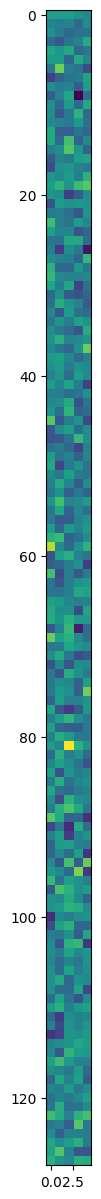

In [12]:
plt.figure(figsize=(15, 15))
plt.imshow(V[:, :5])

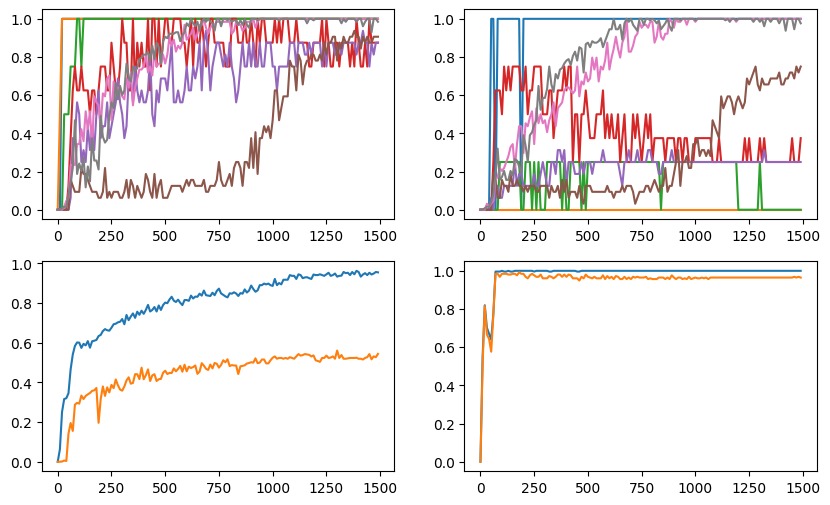

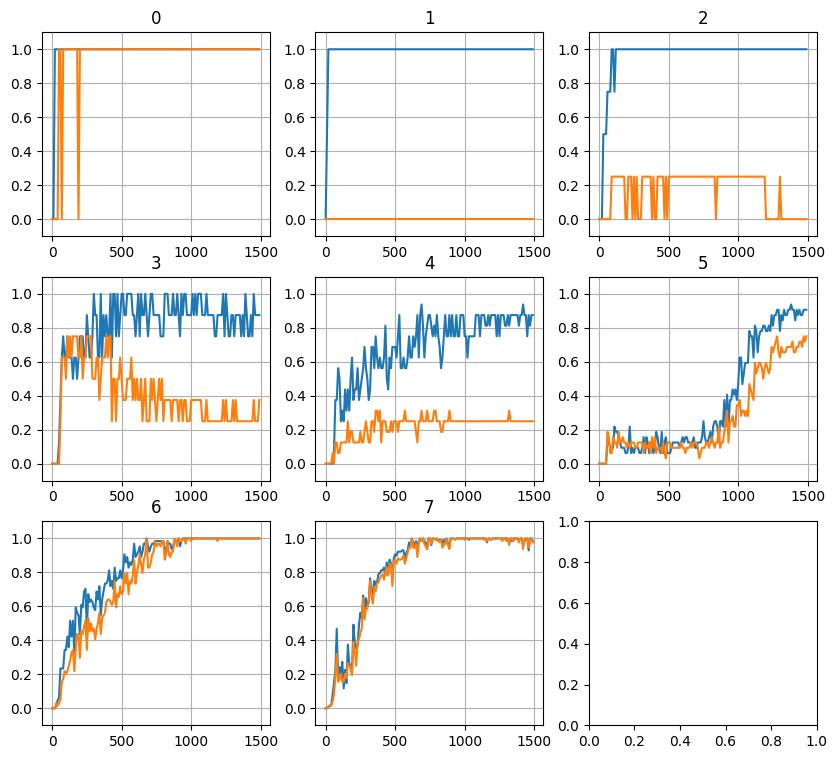

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].plot(evals, acc_by_len)
axes[0, 1].plot(evals, test_acc_by_len)
axes[1, 0].plot(evals, acc_by_len.mean(axis=1))
axes[1, 0].plot(evals, test_acc_by_len.mean(axis=1))
axes[1, 1].plot(evals, spe_acc[:, 2])
axes[1, 1].plot(evals, test_spe_acc[:, 2])
# axes[1, 1].set_xlim(0, 50)

nb_len = 8
fig, axes = plt.subplots(nb_len // 3 + (1 if nb_len % 3 else 0), 3, figsize=(10, 9))
for i in range(nb_len):
    axes[i // 3, i % 3].plot(evals, acc_by_len[:, i])
    axes[i // 3, i % 3].plot(evals, test_acc_by_len[:, i])
    axes[i // 3, i % 3].set_ylim(-.1, 1.1)
    axes[i // 3, i % 3].set_title(i)
    axes[i // 3, i % 3].grid()

In [12]:
# %cd ..
import numpy as np
import torch
import torch.nn.functional as F

from src.cot.config import CHECKPOINT_DIR
from src.cot.data import BinaryCopy, Parity
from src.cot.models import Transformer, TransformerConfig

In [ ]:
rng = np.random.default_rng(0)

torch.manual_seed(0)
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(0)
else:
    device = torch.device("cpu")

In [ ]:
problem="binary-copy"
nb_len=8
split_probas=0.5
max_nb_data_per_len=10_000
zipf_offset=0
zipf_coef=0
emb_dim=128
emb_dropout=0.1
n_head=1
n_layer=1
nb_epochs=1500
learning_rate=1e-3
checkpoint_freq=100
overwrite_checkpoint=True
load_checkpoint=False
eval_freq=10

match problem:
    case "binary-copy":
        Problem = BinaryCopy
    case "parity":
        Problem = Parity
    case _:
        raise ValueError(f"Problem {problem} not recognized.")

In [ ]:

# hyperparameters
lengths = list(np.arange(nb_len) + 1)

if isinstance(split_probas, float):
    split_probas_by_len = split_probas * np.ones(len(lengths))
else:
    split_probas_by_len = np.array(split_probas)
    assert len(split_probas_by_len) == nb_len, "`split_probas` should be of size `nb_len`"

probas_by_len = (np.arange(len(lengths), dtype=float) + zipf_offset) ** (-zipf_coef)
probas_by_len /= probas_by_len.sum()

# main objects
if Problem.prefix == "copy":
    Problem(vocab_size=20)

Problem.generate_datafiles(max_nb_data_per_len, split_probas_by_len, rng)

trainset = Problem()
trainset.set_as_trainset(lengths, probas_by_len)

testset = Problem()
testset.set_as_testset(lengths)

In [ ]:

config = TransformerConfig(
    vocab_size=torch.max(trainset.data).item() + 1,
    emb_dim=emb_dim,
    pos_emb=True,
    seq_len=len(trainset[0]),
    emb_dropout=emb_dropout,
    n_head=n_head,
    n_layer=n_layer,
)

check_dir = CHECKPOINT_DIR / Problem.prefix
# check_dir.mkdir(parents=True, exist_ok=True)

model = Transformer(config)

model.to(device)
probas_by_len = torch.from_numpy(probas_by_len).to(device=device)

path = check_dir / "model.pth"
checkpoint = torch.load(path)

model.load_state_dict(checkpoint["model_state_dict"])

model.eval()

In [ ]:
running_loss = 0
accuracy = 0

sequence = trainset[0]
sequence = sequence.to(device=device, dtype=torch.long)

inputs = sequence[None, :-1]
targets = sequence[None, 1:]

# only train on the chain-of-thoughts process, EoI is represented by 1 in our case
ind = targets == 1
cot_mask = ind.cumsum(axis=1)
cot_mask[ind] = 0
cot_mask = cot_mask.to(dtype=bool)

logits = model(inputs)
loss = F.cross_entropy(logits[cot_mask].view(-1, logits.size(-1)), targets[cot_mask].reshape(-1))